In [1]:
import pandas as pd
import numpy as np
import utils as u
import datetime as dt
from arctic import Arctic

import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib as mpl

In [2]:
# Connect to the local arctic store.
store = Arctic('localhost')
store.list_libraries()

['test', 'Tick_store']

In [3]:
library = store['Tick_store']
library.list_symbols()

['BTCUSD', 'BTCUSD_ob', 'BTCUSD_trades']

In [4]:
trades = library.read('BTCUSD_trades')
df = library.read('BTCUSD_ob')
df_original = df.copy()

In [5]:
initial = df[df.index == df.index[0]]
changes = df[df.index != df.index[0]]

In [6]:
price_lvl = df.price.unique()
max_size = df['size'].quantile(0.9)
min_size = df['size'].quantile(0.1)
#max_size = df['size'].max(skipna=True)

start = df.index[0]
end = df.index[-1]

In [7]:
ob_initial = u.create_orderbook(initial)
ob_final, best_ask, best_bid, time = u.get_bid_ask(changes, ob_initial)

d = {'bid': best_bid, 'ask': best_ask}
time = pd.to_datetime(time)
ba = pd.DataFrame(data=d, index=time)

100%|██████████| 679313/679313 [00:28<00:00, 23973.95it/s]


In [8]:
ba_pct = ba.pct_change().dropna()

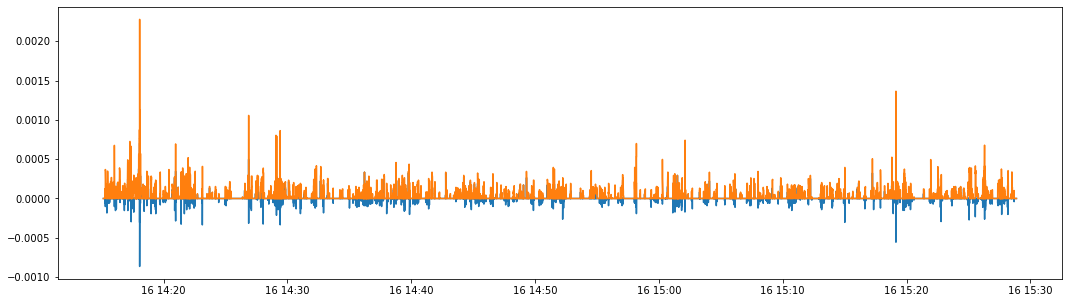

In [43]:
plt.figure(figsize=(18, 5))
plt.plot(ba_pct.ask)
plt.plot(abs(ba_pct.ask).rolling(20).sum())

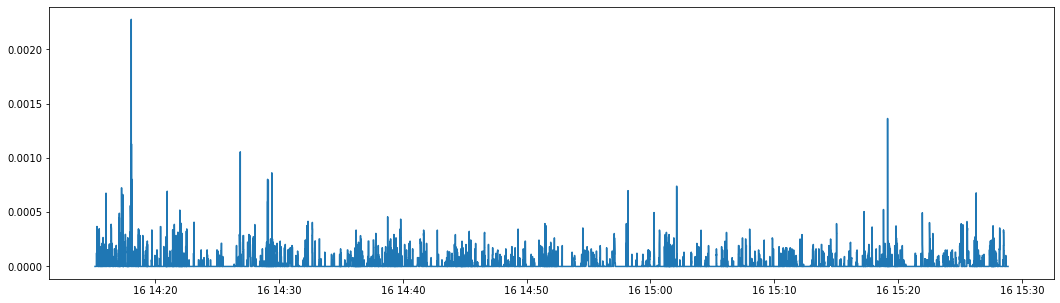

In [40]:
plt.figure(figsize=(18, 5))
plt.plot(abs(ba_pct.ask).rolling(20).sum())

In [60]:
det = pd.Series(np.where(abs(ba_pct.bid).rolling(20).sum() > abs(ba_pct.ask).rolling(20).sum()+0.0005, 1, 0), ba_pct.index)

In [90]:
changes = ba_pct.replace(0, np.nan).rolling(20).count()
changes = pd.Series(np.where(changes.ask > 15, 1, 0), changes.index)

In [138]:
df.groupby(['price']).count().sort_values(by='id')

size  symbol  side    id
price                            
0.5         1       1     1     1
45212.0     1       1     1     1
45207.5     1       1     1     1
45205.5     1       1     1     1
45202.0     1       1     1     1
...       ...     ...   ...   ...
49394.5  1722    1900  1900  1900
49382.5  1919    2087  2087  2087
49370.5  2350    2502  2502  2502
49371.0  2658    2832  2832  2832
49395.0  3041    3180  3180  3180

[14016 rows x 4 columns]

In [22]:
colmap = cm.get_cmap('plasma', 50)
tmp = df['2021-02-16 16:10':'2021-02-16 16:15']

# Export relevant range of df
upper = 49450
lower = 49250

tmp = tmp[(tmp.price > lower) & (tmp.price < upper)]

price_lvl = tmp.price.unique()
max_size = tmp['size'].quantile(0.9)
min_size = tmp['size'].quantile(0.1)
y, x_start, x_end, col = u.create_levels(tmp, price_lvl, max_size, min_size, end, colmap)

100%|██████████| 398/398 [00:03<00:00, 113.59it/s]


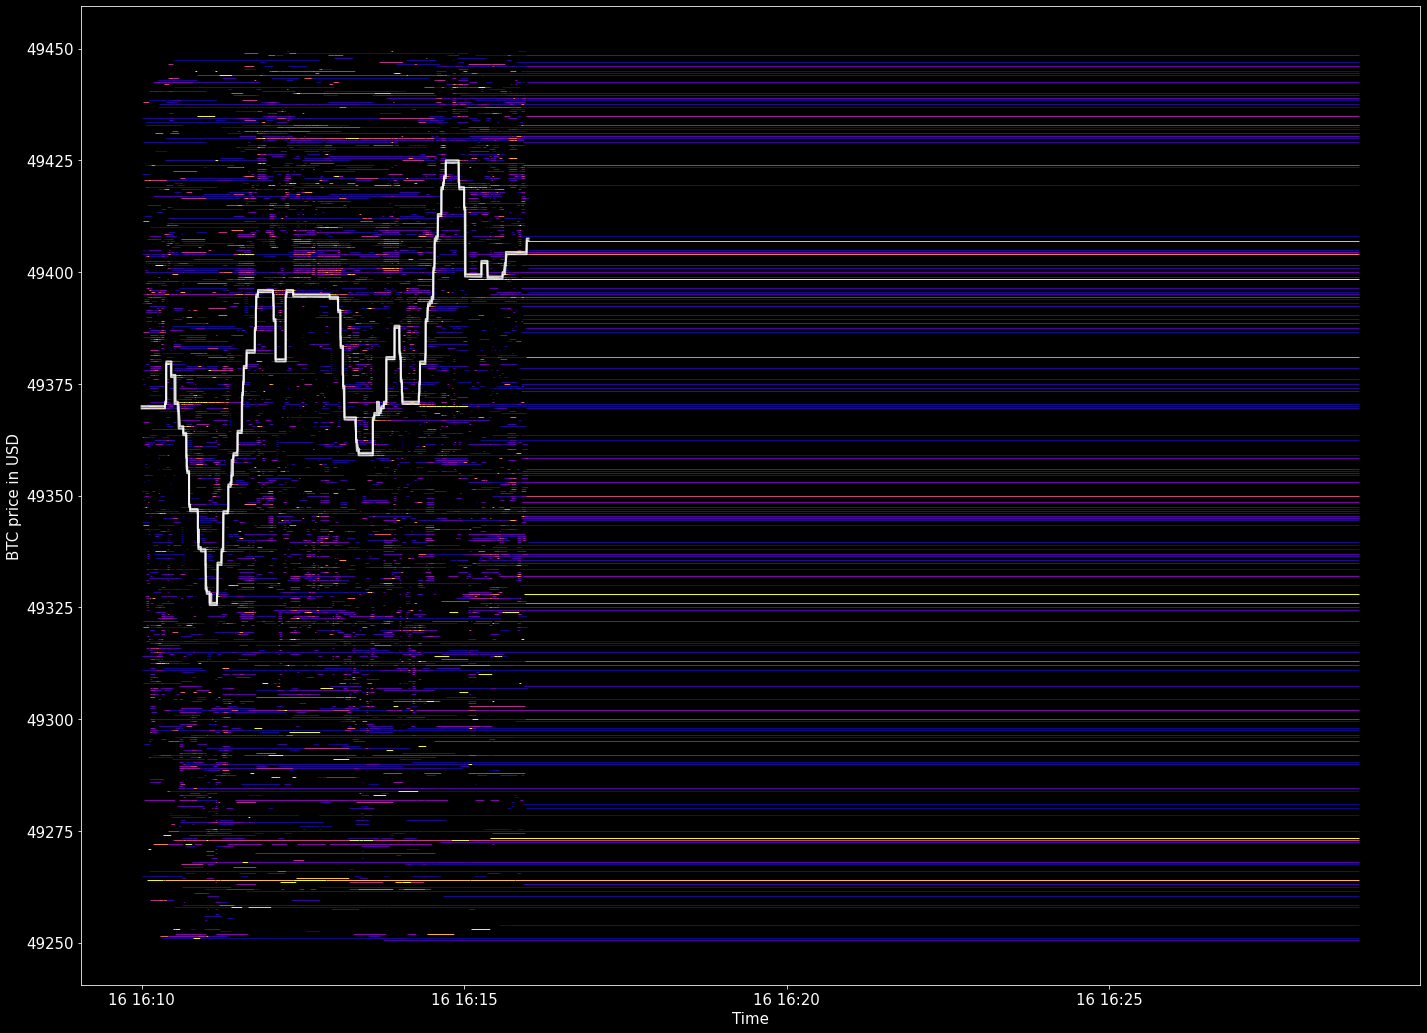

In [23]:
plt.style.use('dark_background')
plt.figure(figsize=(24, 18))
plt.rcParams.update({'font.size': 15})
plt.hlines(y, pd.to_datetime(x_start), pd.to_datetime(x_end), lw=1, color=col, alpha=1, zorder=0)
plt.plot(ba['2021-02-16 16:10':'2021-02-16 16:15'], label='Mid Price', color='w', lw=2, alpha=0.8)
plt.xlabel('Time')
plt.ylabel('BTC price in USD')
plt.show()

<AxesSubplot:>

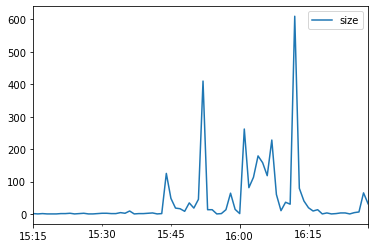

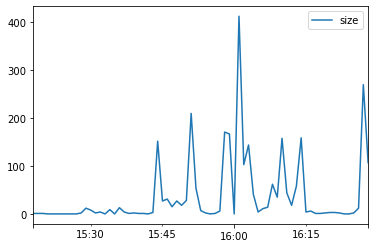

In [163]:
df[df.price == 49395.0].resample("1T").agg({'size':'count'}).plot()
df[df.price == 49371.0].resample("1T").agg({'size':'count'}).plot()

<AxesSubplot:>

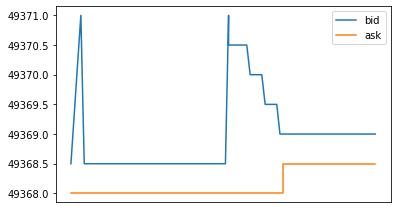

In [162]:
ba['2021-02-16 16:13:39':'2021-02-16 16:13:41'].plot()

<AxesSubplot:>

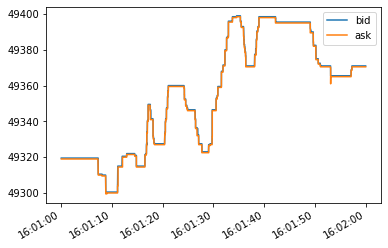

In [166]:
ba['2021-02-16 16:01'].plot()

<AxesSubplot:>

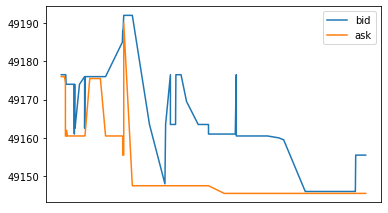

In [146]:
ba['2021-02-16 15:18:04':'2021-02-16 15:18:04'].plot()

<AxesSubplot:>

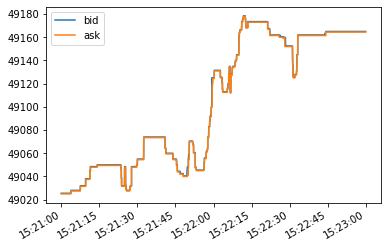

In [74]:
ba['2021-02-16 15:21':'2021-02-16 15:22'].plot()

<AxesSubplot:>

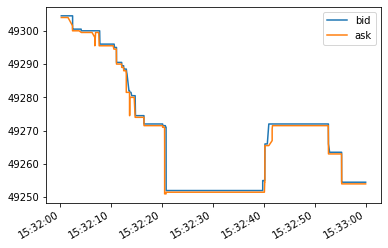

In [77]:
ba['2021-02-16 15:32':'2021-02-16 15:32'].plot()

In [124]:
count_second = ba.resample("1S").agg({'ask':'count'})
count_thres = pd.Series(np.where(count_second.ask > 300, 1, 0), count_second.index)

In [125]:
count_thres[count_thres != 0]

2021-02-16 15:44:41+01:00    1
2021-02-16 15:44:43+01:00    1
2021-02-16 15:44:45+01:00    1
2021-02-16 15:52:06+01:00    1
dtype: int32

<AxesSubplot:>

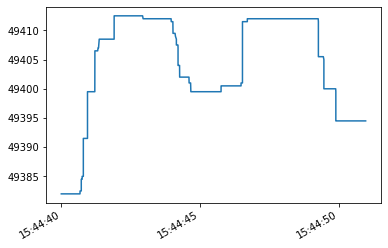

In [127]:
ba['2021-02-16 15:44:40':'2021-02-16 15:44:50'].ask.plot()